# Data Engineer Challenge

# Ejercicios

1. Las top 10 fechas donde hay más tweets. Mencionar el usuario (username) que más publicaciones tiene por cada uno de esos días.
    
    Returns: [(datetime.date(1999, 11, 15), "LATAM321"), (datetime.date(1999, 7, 15), "LATAM_CHI"), ...]  

2. Los top 10 emojis más usados con su respectivo conteo. 

    Returns: [("✈️", 6856), ("❤️", 5876), ...]

3. El top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos.
    
    Returns: [("LATAM321", 387), ("LATAM_CHI", 129), ...]

# Aclaraciones

1. Para la solución de los tres ejercicios como primer paso se obtuvo el esquema de la información compartida para poder entender de donde se puede obtener cada parte.

    Columnas dentro del archivo leído:

    * content: string,
    * conversationId: long, 
    * date: string, 
    * id: long, 
    * lang: string,
    * likeCount: long, 
    * media: array, 
    * mentionedUsers: array, 
    * outlinks: array, 
    * quoteCount: long, 
    ...
    * sourceUrl: string, 
    * tcooutlinks: array, 
    * url: string,
    * user: struct

    Struct User:

    * created: string,
    * description: string,
    ...
    * username: string,
    * verified: boolean

    Array Mentioned Users:

    * created: string,
    * description: string,
    ...
    * username: string,
    * verified: strin


**NOTA**: Los "..." indican que hay más campos que no se listaron. La idea fue mostrar los más relevantes para los ejercicios propuestos y algunos extra de ejemplo.

2. Para conseguir las dos versiones solicitadas en el enunciado, una optimizando memoria y la otra optimizando tiempo de ejecución; opte por utilizar en una de las soluciones pyspark y en la otra python + pandas.

3. Antes de probar los resultados de los ejercicios es importante que el archivo que se quiere evaluar se encuentre en la carpeta **data** dentro del repositorio.

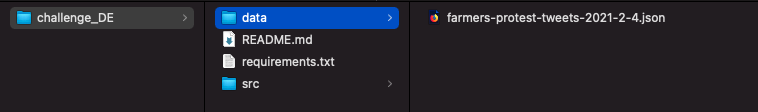

4. Dentro de la carpeta src existe un archivo **testing.py** que contiene los tests creados para textear las 6 fuciones desarrolladas. Como mejora se podrian sumar más casos de uso porque actualmente solo se considera un archivo con pocos registros y un archivo con json vacío.

5. En el ejecicio 2 y en el 3 si bien implemente dos opciones de código la versión en spark es superior tanto en optimización de memoria como en optimización de tiempo de ejecución si se las compara entre si.

# Soluciones

Los siguientes códigos son generales a todas las funciones:

In [5]:
# Se utiliza para obtener el path donde esta el archivo que voy a leer
import os

file_path = "farmers-protest-tweets-2021-2-4.json"
dir_root = os.path.dirname(os.path.abspath(""))
path = dir_root + "/data/" + file_path

In [2]:
# Comando para cargar las funciones de memory_profiler 
%load_ext memory_profiler

# Ejercicio 1

Para poder retornar el top 10 de las fechas de mayor tweets y el username que más tweets hizo, por un lado tome la fecha de creación y conte cuantos tweets se hicieron cada día. Por otro lado tome por fecha y username la cantidad de tweets, y me quede de cada fecha con el username cuya cantidad fue mayor. Como último paso uni la información de los dos resultados parciales y genere un único resultado, usando como key la fecha del tweet.  
Como **resultado** genere una lista de tuplas (fecha, username).

# Optimización de Memoria

En este caso opte por utilizar como **tecnología pyspark** que aprovecha mejor los recursos.   

Código para ejecutar de solución

In [6]:
from q1_memory import q1_memory

print(q1_memory(path)) 

Código para analizar el tiempo de ejecución

In [15]:
from q1_memory import q1_memory
%prun q1_memory(path) # 10.676 seconds ejemplo de una de las ejecuciones

Código para analizar el uso de memoria

In [21]:
from q1_memory import q1_memory

# memit --> retorna el consumo general de memoria
%memit q1_memory(path) # peak memory: 322.46 MiB, increment: -0.98 MiB ejemplo de una de las ejecuciones

In [16]:
# mprun --> retorna el consumo linea por linea
%mprun -f q1_memory q1_memory(path) 

# Optimización de Tiempo de ejecución

En este caso opte por utilizar como **tecnología python/pandas**. 

Código para ejecutar la solución

In [2]:
from q1_time import q1_time

print(q1_time(path)) 

Código para analizar el tiempo de ejecución

In [40]:
from q1_time import q1_time
%prun q1_time(path) # 7.907 seconds ejemplo de una de las ejecuciones

Código para analizar el uso de memoria

In [1]:
from q1_time import q1_time

# memit --> retorna el consumo general de memoria
%memit q1_time(path) # peak memory: 1636.82 MiB, increment: 1490.76 MiB ejemplo de una de las ejecuciones

In [16]:
# mprun --> retorna el consumo linea por linea
%mprun -f q1_time q1_time(path) 

# Ejercicio 2

Para poder retornar el top 10 de emojis más usados de la información obtenida me quede solo con el campo content, que contiene el texto del tweet. Por cada uno de los tweets cree una nueva columna conteniendo un arreglo de los emojis que se utilizaron y descarte aquellas lineas que no contenian emojis. A continuacío conté la cantidad dee apariciones de cada emoji y retorne como **resultado** una lista de tuplas (emoji, cant).

# Optimización de Memoria

En este caso opte por utilizar como **tecnología pyspark** que aprovecha mejor los recursos.   

Código para ejecutar de solución

In [28]:
from q2_memory import q2_memory

print(q2_memory(path)) 

Código para analizar el tiempo de ejecución

In [29]:
from q2_memory import q2_memory
%prun q2_memory(path) # 16.582 seconds ejemplo de una de las ejecuciones

Código para analizar el uso de memoria

In [30]:
from q2_memory import q2_memory

# memit --> retorna el consumo general de memoria
%memit q2_memory(path) # peak memory: 397.19 MiB, increment: 0.00 MiB

In [16]:
# mprun --> retorna el consumo linea por linea
%mprun -f q2_memory q2_memory(path) 

# Optimización de Tiempo de ejecución

En este caso opte por utilizar como **tecnología python/pandas**.   

Código para ejecutar la solución

In [37]:
from q2_time import q2_time

print(q2_time(path)) 

Código para analizar el tiempo de ejecución

In [39]:
from q2_time import q2_time
%prun q2_time(path) # 50.743 seconds

Código para analizar el uso de memoria

In [35]:
from q2_time import q2_time

# memit --> retorna el consumo general de memoria
%memit q2_time(path) # peak memory: 1651.18 MiB, increment: 1178.53 MiB

In [36]:
# mprun --> retorna el consumo linea por linea
%mprun -f q2_time q2_time(path) 

# Ejercicio 3

Para poder retornar el top 10 histórico de usuarios (username) más influyentes, en función del conteo de las menciones (@) que registra cada uno de ellos, de la información disponible solo tome el campo mentionedUsers (campo contiene el listado de users mensionados en el tweet). Como primera instancia elimine las lineas donde el campo mentionedUsers es null porque en esos casos no se menciona a nadie. Luego de toda la información me quede solo con el username y genere filas por cada uno de los elementos dentro de la lista de mencionados. Agrupe valores por username y conte la cantidad de apariciones. Por último genere la lista de tuplas (mentioned_users, count) y me quede con los 10 username que mayor cantidad tuvieron. Esta lista final es lo que se retorna como **resultado**.

# Optimización de Memoria

En este caso opte por utilizar como **tecnología pyspark** que aprovecha mejor los recursos.   

Código para ejecutar de solución

In [8]:
from q3_memory import q3_memory

print(q3_memory(path)) 

Código para analizar el tiempo de ejecución

In [7]:
from q3_memory import q3_memory
%prun q3_memory(path) # 6.419 seconds ejemplo de una de las ejecuciones

Código para analizar el uso de memoria

In [5]:
from q3_memory import q3_memory

# memit --> retorna el consumo general de memoria
%memit q3_memory(path) # peak memory: 130.83 MiB, increment: 2.71 MiB

In [6]:
# mprun --> retorna el consumo linea por linea
%mprun -f q3_memory q3_memory(path) 

# Optimización de Tiempo de ejecución

En este caso opte por utilizar como **tecnología python/pandas**.   

Código para ejecutar la solución

In [4]:
from q3_time import q3_time

print(q3_time(path)) 

Código para analizar el tiempo de ejecución

In [5]:
from q3_time import q3_time
%prun q3_time(path) # 8.164 seconds ejemplo de una de las ejecuciones

Código para analizar el uso de memoria

In [3]:
from q3_time import q3_time

# memit --> retorna el consumo general de memoria
%memit q3_time(path) # peak memory: 1618.73 MiB, increment: 1397.87 MiB

In [7]:
# mprun --> retorna el consumo linea por linea
%mprun -f q3_time q3_time(path) 